In [1]:
import numpy as np
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
from perimeter_area import perimeter_area
from helper_functions import noisy_nonperiodic_xfbm as nnxfbm
from helper_functions import noisy_xfbm
from helper_functions import root_mean_square_error

from tqdm import tqdm

In [2]:
N_iter = 1000
S_max=3
E=2

H_samples = np.random.random(N_iter)
S_samples = np.random.random(N_iter)*S_max
noise_samples = np.random.random(N_iter)*0.05

In [3]:
N_pix = [128,64,32]

S_est_pure = {'128':[],
              '64':[],
              '32':[]}
S_est_nonperiodic = {'128':[],
              '64':[],
              '32':[]}
S_est_noisy = {'128':[],
              '64':[],
              '32':[]}
S_est_noisy_nonperiodic = {'128':[],
              '64':[],
              '32':[]}


for npix in N_pix:
    for H, S, noise in tqdm(zip(H_samples, S_samples, noise_samples), total=N_iter):

        field = ss.fBm(N=npix, E=E, H=H, sigma=S, exp=True, periodic=True)
        S_est_pure[str(npix)].append(np.nanstd(np.log(field.flatten())))

        field = ss.fBm(N=npix, E=E, H=H, sigma=S, exp=True, periodic=False)
        S_est_nonperiodic[str(npix)].append(np.nanstd(np.log(field.flatten())))

        field = noisy_xfbm(N=npix, E=E, H=H, S=S, noise=noise, normalise = False)
        S_est_noisy[str(npix)].append(np.nanstd(np.log(field.flatten())))

        field = nnxfbm(N=npix, E=E, H=H, S=S, noise=noise, normalise=False)
        S_est_noisy_nonperiodic[str(npix)].append(np.nanstd(np.log(field.flatten())))

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Github\thesis-images\SpectralSynthesis.py:61: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\Matt\AppData\Local\Temp\ipykernel_24912\2724673861.py:27: RuntimeWarning: invalid value encountered in log
  S_est_noisy[str(npix)].append(np.nanstd(np.log(field.flatten())))
C:\Users\Matt\AppData\Local\Temp\ipykernel_24912\2724673861.py:30: RuntimeWarning: invalid value encountered in log
  S_est_noisy_nonperiodic[str(npix)].append(np.nanstd(np.log(field.flatten())))
100%|██████████| 1000/1000 [00:37<00:00, 26.96it/s]


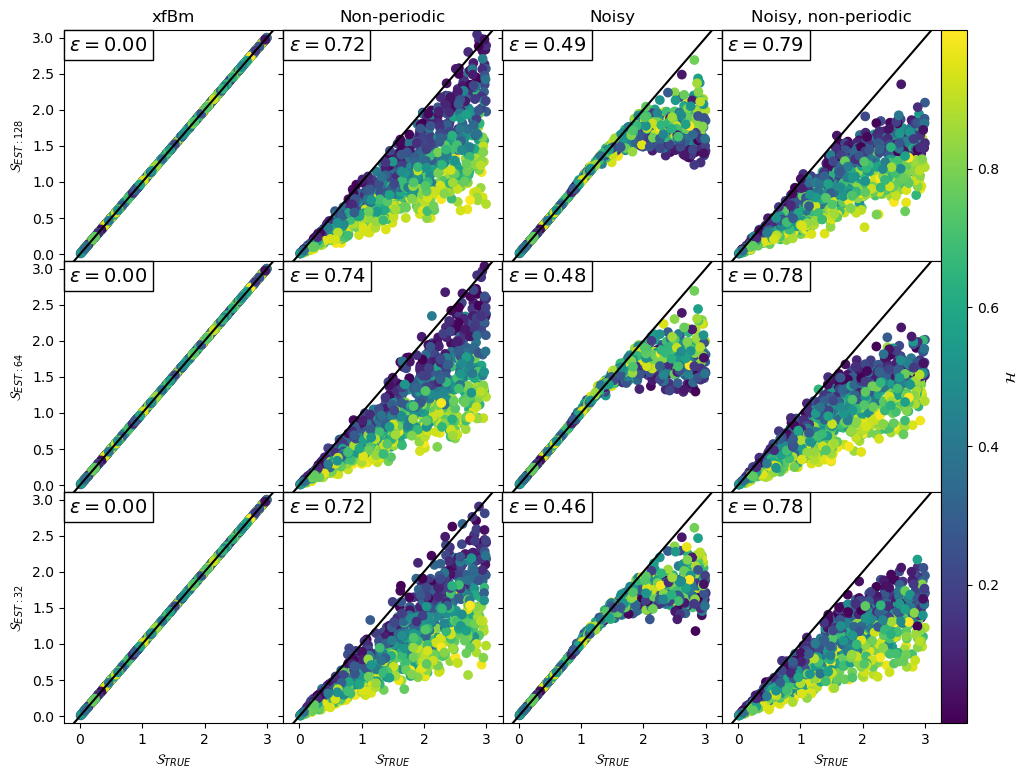

In [8]:
props = dict(facecolor='white', alpha=1)

f,ax = plt.subplots(3,4, figsize = (13,9), sharex=True, sharey=True)
for i, npix in enumerate(N_pix):

    
    ax[i,0].scatter(S_samples, S_est_pure[str(npix)], c=H_samples)
    ax[i,1].scatter(S_samples, S_est_nonperiodic[str(npix)], c=H_samples)
    ax[i,2].scatter(S_samples, S_est_noisy[str(npix)], c=H_samples)
    im=ax[i,3].scatter(S_samples, S_est_noisy_nonperiodic[str(npix)], c=H_samples)

    ax[i,0].plot([-0.1,3.1], [-0.1,3.1], c='k')
    ax[i,1].plot([-0.1,3.1], [-0.1,3.1], c='k')
    ax[i,2].plot([-0.1,3.1], [-0.1,3.1], c='k')
    ax[i,3].plot([-0.1,3.1], [-0.1,3.1], c='k')

    ax[i,0].set_ylabel(fr'$\mathcal{{S}}_{{EST:{npix}}}$')
    ax[2,i].set_xlabel(fr'$\mathcal{{S}}_{{TRUE}}$')

    loss = root_mean_square_error(y_actual=S_samples, y_predict=S_est_pure[str(npix)])
    ax[i,0].text(0.025, 0.977, fr'$\epsilon = {loss:.2f}$', transform=ax[i,0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    loss = root_mean_square_error(y_actual=S_samples, y_predict=S_est_nonperiodic[str(npix)])
    ax[i,1].text(0.025, 0.977, fr'$\epsilon = {loss:.2f}$', transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    loss = root_mean_square_error(y_actual=S_samples, y_predict=S_est_noisy[str(npix)])
    ax[i,2].text(0.025, 0.977, fr'$\epsilon = {loss:.2f}$', transform=ax[i,2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    loss = root_mean_square_error(y_actual=S_samples, y_predict=S_est_noisy_nonperiodic[str(npix)])
    ax[i,3].text(0.025, 0.977, fr'$\epsilon = {loss:.2f}$', transform=ax[i,3].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    

ax[2,-1].set_xlabel(fr'$\mathcal{{S}}_{{TRUE}}$')

ax[0,3].set_ylim(-0.1,3.1)

ax[0,0].set_title('xfBm')
ax[0,1].set_title('Non-periodic')
ax[0,2].set_title('Noisy')
ax[0,3].set_title('Noisy, non-periodic')


f.subplots_adjust(wspace=0, hspace=0)
f.subplots_adjust(right=0.8)

cbar_ax=f.add_axes([0.8, 0.1099, 0.02, 0.77])
f.colorbar(im,cax=cbar_ax, label = r'$\mathcal{H}$')

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 3/Estimating S.png', bbox_inches = 'tight')

plt.show()